In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
#needed function for logistic Regression
def sigmoid(z):
    return 1 / (1 + np.exp(-1 * z))

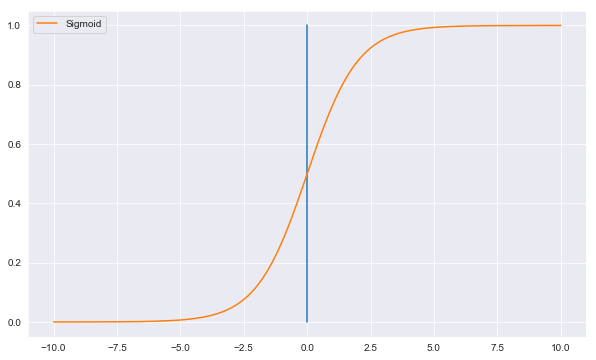

In [20]:
plt.figure(figsize=(10,6))
a = np.linspace(-10,10,num=200000)
plt.plot([0,0],[0,1])
plt.plot(a,sigmoid(a),label="Sigmoid")
plt.legend()
plt.grid(True)

In [44]:
X = np.arange(1,21,1)
y = np.where(X<=10,0,1)

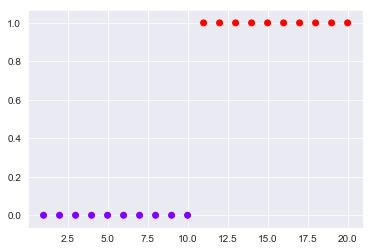

In [45]:
plt.scatter(X,y,c=y,cmap='rainbow')

In [28]:
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

In [56]:
def costfunction(X,y,theta):
    m = X.shape[1]
    cost = (-1/m) * ( np.sum(y*np.log(hypothesis(X,theta))) + np.sum((1-y) * np.log(1-hypothesis(X,theta))))
    return cost

In [37]:
def update_parameter(X,y,theta,alpha=0.005):
    m = X.shape[0]
    theta -= alpha * (1 / m) * np.dot((hypothesis(X,theta)-y).T , X).T
    return theta

In [32]:
def reshapeData(X):
    X = np.insert(X,0,1,axis=1)
    return X

In [36]:
def initialParams(X):
    theta = np.zeros((X.shape[1],1))
    return theta

In [58]:
def LogisticModel(X,y,alpha=0.0005,iteration=2000,print_details=False):
    X = reshapeData(X)
    theta = initialParams(X)
    
    if print_details:
        print("Loss on %d iteration is : %.3f"%(0,costfunction(X,y,theta)))
        
    for it in range(iteration):
        theta = update_parameter(X,y,theta,alpha=alpha)
        if print_details and it%100==0:
            print("Loss on %d iteration is : %.3f"%(it,costfunction(X,y,theta)))
    return theta

In [51]:
X = X[np.newaxis]
y = y[np.newaxis]
print(X.shape)
print(y.shape)

(1, 20)
(1, 20)


In [52]:
X = X.T
y = y.T

print(X.shape)
print(y.shape)

(20, 1)
(20, 1)


In [64]:
theta = LogisticModel(X,y,iteration=500001,print_details=False)

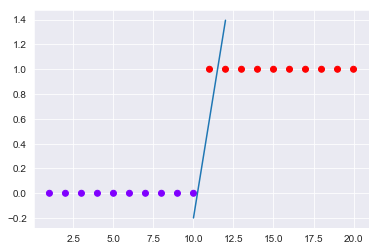

In [103]:
X_copy = np.arange(1,21,1)
y_copy = np.where(X<=10,0,1)

plt.scatter(X_copy,y_copy,c=y_copy,cmap='rainbow')
plt.plot(np.arange(10,12.4), (np.arange(10,12.4)*theta[1,0]) + theta[0,0])

In [93]:
def predict(X,theta):
    return np.where(hypothesis(np.insert(X,0,1,axis=1),theta) < 0.5 , 0, 1)

In [108]:
X_pred = [[-100],[-50],[5],[9],[10],[11],[12],[13],[50]]
pred = predict(X_pred,theta)
print("condition is : if num <=10 return 0 else return 1\n*************************************************")
print("\nNumber\tPrediction")
for (i,j) in zip(X_pred,pred):
    print("%d\t\t%d"%(i[0],j[0]))

condition is : if num <=10 return 0 else return 1
*************************************************

Number	Prediction
-100		0
-50		0
5		0
9		0
10		0
11		1
12		1
13		1
50		1


In [109]:
from sklearn.linear_model import LogisticRegression

In [113]:
modelLR = LogisticRegression().fit(X_copy.reshape(X_copy.shape[0],1),y_copy)

C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ANKIT PODDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
theta

array([[-8.16813033],
       [ 0.79694087]])

In [116]:
modelLR.intercept_

array([-1.89610137])

In [117]:
modelLR.coef_

array([[0.23200146]])

In [120]:
X_pred = [[-100],[-50],[5],[9],[10],[11],[12],[13],[50]]
pred = modelLR.predict(X_pred)
print("condition is : if num <=10 return 0 else return 1\n*************************************************")
print("\nNumber\tPrediction")
for (i,j) in zip(X_pred,pred):
    print("%d\t\t%d"%(i[0],j))

condition is : if num <=10 return 0 else return 1
*************************************************

Number	Prediction
-100		0
-50		0
5		0
9		1
10		1
11		1
12		1
13		1
50		1


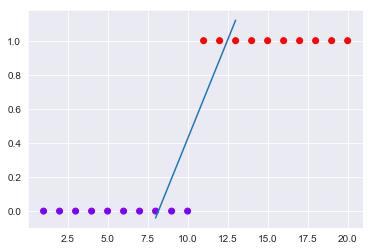

In [126]:
X_copy = np.arange(1,21,1)
y_copy = np.where(X<=10,0,1)

plt.scatter(X_copy,y_copy,c=y_copy,cmap='rainbow')
plt.plot(np.arange(8,14), (np.arange(8,14)*modelLR.coef_[0,0] + modelLR.intercept_[0]))

Text(0.5, 1.0, 'Sklearn Model')

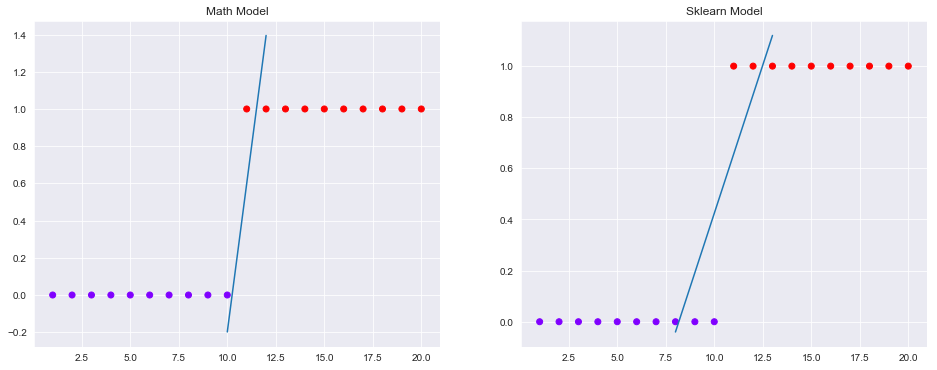

In [127]:
X_copy = np.arange(1,21,1)
y_copy = np.where(X<=10,0,1)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

ax1.scatter(X_copy,y_copy,c=y_copy,cmap='rainbow')
ax1.plot(np.arange(10,12.4), (np.arange(10,12.4)*theta[1,0]) + theta[0,0])
ax1.set_title("Math Model")
                                                                     
ax2.scatter(X_copy,y_copy,c=y_copy,cmap='rainbow')
ax2.plot(np.arange(8,14), (np.arange(8,14)*modelLR.coef_[0,0] + modelLR.intercept_[0]))
ax2.set_title("Sklearn Model")